# Neural Network

# Model  for predict binary-class

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt 

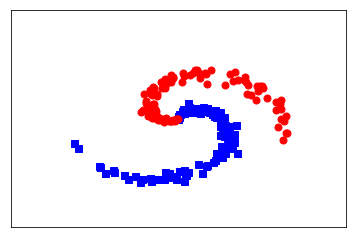

In [2]:


N = 100 # number of points per class
d0 = 2 # dimensionality
C = 2 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5]) 
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()

In [3]:
 X.shape

(2, 200)

In [4]:
## One-hot coding
from scipy import sparse 
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

# tanh
def tanh(x):
    return np.tanh(x)
def tanh_prime(x):
    return 1-np.tanh(x)**2

# sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))


# RELU
def relu(x):
    return np.maximum(x,0)
def relu_prime(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

# sofftmax
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

# lost mean-square error
def loss_mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))
# cost or lost Softmax Regression  
def loss_softmax(Y, Yhat):    
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]
 

In [5]:
d0 = 2
d1 = d2 =  h = 100 # size of hidden layer 
d3 = C = 2
# initialize parameters randomely 
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))
W3 = 0.01*np.random.randn(d2, d3)
b3 = np.zeros((d3, 1))

# X = X.T # each column of X is a data point 
Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate 
for i in range(2000):
    ## Feedforward 
    Z1 = np.dot(W1.T, X) + b1 
    A1 = tanh(Z1)
    Z2 = np.dot(W2.T, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3.T, A2) + b3
    # Yhat = A3
    Yhat = sigmoid(Z3)
    
    # compute the loss: average cross-entropy loss
    loss = loss_mse(Y, Yhat)
    
    # print loss after each 1000 iterations
    if i %200 == 0: 
        print("iter %d, loss: %f" %(i, loss))
    
    # backpropagation
    E3 = (2/N*(Yhat - Y )*Yhat*(1-Yhat)) 
    dW3 = np.dot(A2, E3.T)
    db3 = np.sum(E3, axis = 1, keepdims = True)
    E2 = np.dot(W3, E3)*relu_prime(Z2)
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)*tanh_prime(Z1)
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    # Gradient Descent update 
    # import pdb; pdb.set_trace()  # breakpoint 47741f63 //
    W3 += -eta*dW3
    b3 += -eta*db3
    W2 += -eta*dW2
    b2 += -eta*db2
    W1 += -eta*dW1 
    b1 += -eta*db1 
    

## Feedforward 
Z1 = np.dot(W1.T, X) + b1 
A1 = tanh(Z1)
Z2 = np.dot(W2.T, A1) + b2
A2 = relu(Z2)
Z3 = np.dot(W3.T, A2) + b3
# Yhat = A3
Yhat = softmax(Z3)
predicted_class = np.argmax(Yhat, axis=0)
acc = (100*np.mean(predicted_class == y))
print('training accuracy: %.2f %%' % acc)
 

iter 0, loss: 0.249999
iter 200, loss: 0.137477
iter 400, loss: 0.137052
iter 600, loss: 0.133705
iter 800, loss: 0.038565
iter 1000, loss: 0.021654
iter 1200, loss: 0.018256
iter 1400, loss: 0.014050
iter 1600, loss: 0.012092
iter 1800, loss: 0.010592
training accuracy: 99.00 %


(2, 14400)
100


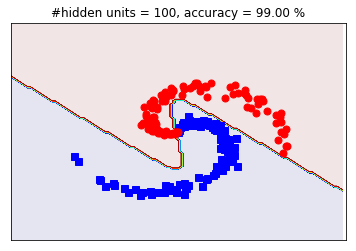

In [6]:
# Visualize results 
#Visualize 


xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)


# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()
# print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)

X0 = np.vstack((xx1, yy1))
print(X0.shape)
## Feedforward 
Z1 = np.dot(W1.T, X0) + b1 
A1 = tanh(Z1)
Z2 = np.dot(W2.T, A1) + b2
A2 = relu(Z2)
Z3 = np.dot(W3.T, A2) + b3
# Yhat = A3
Yhat = sigmoid(Z3)
Z = np.argmax(Yhat, axis=0)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

# X = X.T
N = 100
print(N)


plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
# plt.axis('equal')
# display(X[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show() 

 #  M o del for predict multi-classes

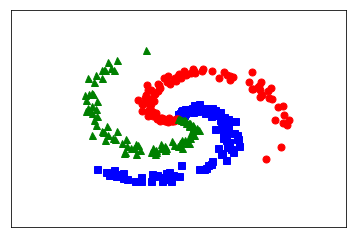

In [7]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

# plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show() 

In [8]:
## One-hot coding
from scipy import sparse 
def convert_labels(y, C = 3):
    Y = sparse.coo_matrix((np.ones_like(y), 
        (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y 

# tanh
def tanh(x):
    return np.tanh(x)
def tanh_prime(x):
    return 1-np.tanh(x)**2

# RELU
def relu(x):
    return np.maximum(x,0)
def relu_prime(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

# sofftmax
def softmax(V):
    e_V = np.exp(V - np.max(V, axis = 0, keepdims = True))
    Z = e_V / e_V.sum(axis = 0)
    return Z

# cost or loss Softmax Regression  
def loss_crossentropy(Y, Yhat):    
    return -np.sum(Y*np.log(Yhat))/Y.shape[1] 

In [9]:
d0 = 2
d1 = d2 =  h = 100 # size of hidden layer 
d3 = C = 3
# initialize parameters randomely 
W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((d1, 1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2, 1))
W3 = 0.01*np.random.randn(d2, d3)
b3 = np.zeros((d3, 1))

# X = X.T # each column of X is a data point 
Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 # learning rate 
for i in range(5000):
    ## Feedforward 
    Z1 = np.dot(W1.T, X) + b1 
    A1 = tanh(Z1)
    Z2 = np.dot(W2.T, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3.T, A2) + b3
    # Yhat = A3
    Yhat = softmax(Z3)
    
    # compute the loss: average cross-entropy loss
    loss = loss_crossentropy(Y, Yhat)
    
    # print loss after each 1000 iterations
    if i %1000 == 0: 
        print("iter %d, loss: %f" %(i, loss))
    
    # backpropagation
    E3 = (Yhat - Y )/N
    dW3 = np.dot(A2, E3.T)
    db3 = np.sum(E3, axis = 1, keepdims = True)
    E2 = np.dot(W3, E3)*relu_prime(Z2)
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis = 1, keepdims = True)
    E1 = np.dot(W2, E2)*tanh_prime(Z1)
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis = 1, keepdims = True)
    
    # Gradient Descent update 
    # import pdb; pdb.set_trace()  # breakpoint 47741f63 //
    W3 += -eta*dW3
    b3 += -eta*db3
    W2 += -eta*dW2
    b2 += -eta*db2
    W1 += -eta*dW1 
    b1 += -eta*db1 
    

## Feedforward 
Z1 = np.dot(W1.T, X) + b1 
A1 = tanh(Z1)
Z2 = np.dot(W2.T, A1) + b2
A2 = relu(Z2)
Z3 = np.dot(W3.T, A2) + b3
# Yhat = A3
Yhat = softmax(Z3)
predicted_class = np.argmax(Yhat, axis=0)
acc = (100*np.mean(predicted_class == y))
print('training accuracy: %.2f %%' % acc) 

iter 0, loss: 1.098618
iter 1000, loss: 0.033080
iter 2000, loss: 0.023719
iter 3000, loss: 0.018900
iter 4000, loss: 0.017469
training accuracy: 99.00 %


(2, 14400)
100


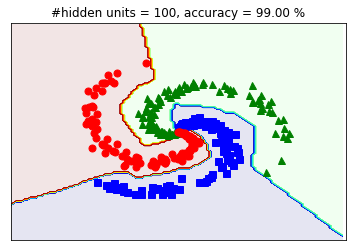

In [10]:
# Visualize results 
#Visualize 

xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)
 

# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# xx.ravel(), yy.ravel()
# print(np.ones((1, xx.size)).shape)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)

# print(xx.shape, yy.shape)
# XX = np.concatenate((np.ones((1, xx.size)), xx1, yy1), axis = 0)

X0 = np.vstack((xx1, yy1))
print(X0.shape)
## Feedforward 
Z1 = np.dot(W1.T, X0) + b1 
A1 = tanh(Z1)
Z2 = np.dot(W2.T, A1) + b2
A2 = relu(Z2)
Z3 = np.dot(W3.T, A2) + b3
# Yhat = A3
Yhat = softmax(Z3)
Z = np.argmax(Yhat, axis=0)

Z = Z.reshape(xx.shape)
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .1)

# Plot also the training points
# plt.scatter(X[:, 1], X[:, 2], c=Y, edgecolors='k', cmap=plt.cm.Paired)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

# X = X.T
N = 100
print(N)


plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'g^', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'ro', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
plt.title('#hidden units = %d, accuracy = %.2f %%' %(d1, acc))
# plt.axis('equal')
# display(X[1:, :], original_label)
fn = 'ex_res'+ str(d1) + '.png'
# plt.savefig(fn, bbox_inches='tight', dpi = 600)
plt.show()